In [68]:
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
df = pd.read_csv('final_data.csv').drop(
    columns='Unnamed: 0').set_index('country')

In [70]:
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,pop_1998,pop_2018,Population_diff,gdp_1998,gdp_2018,GDP_diff,sub-region,Religion,latitude,longitude
country,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0.0,AF,AFG,Asia,AS,19737765.0,37172386.0,0.883313,NaN,1.936297e+10,NaN,Southern Asia,Muslims,33.939110,67.709953
Albania,89,132,54,4.9,AL,ALB,Europe,EU,3128530.0,2866376.0,-0.083795,2.545967e+09,1.510250e+10,4.931931,Southern Europe,Muslims,41.153332,20.168331
Algeria,25,0,14,0.7,DZ,DZA,Africa,AF,30192754.0,42228429.0,0.398628,4.818775e+10,1.737580e+11,2.605853,Northern Africa,Muslims,28.033886,1.659626
Andorra,245,138,312,12.4,AD,AND,Europe,EU,64142.0,77006.0,0.200555,1.211932e+09,3.236544e+09,1.670565,Southern Europe,Christians,42.546245,1.601554
Angola,217,57,45,5.9,AO,AGO,Africa,AF,15359601.0,30809762.0,1.005896,6.506230e+09,1.057510e+11,15.253805,Sub-Saharan Africa,Christians,-11.202692,17.873887


# Analyze missing data

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
beer_servings                   179 non-null int64
spirit_servings                 179 non-null int64
wine_servings                   179 non-null int64
total_litres_of_pure_alcohol    179 non-null float64
Code                            178 non-null object
Three_Letter_Country_Code       179 non-null object
Continent_Name                  179 non-null object
Continent_Code                  157 non-null object
pop_1998                        179 non-null float64
pop_2018                        179 non-null float64
Population_diff                 179 non-null float64
gdp_1998                        168 non-null float64
gdp_2018                        177 non-null float64
GDP_diff                        167 non-null float64
sub-region                      179 non-null object
Religion                        179 non-null object
latitude                        178 non-null floa

## Continent code

In [72]:
df[df['Continent_Code'].isna()]['Continent_Name'].value_counts()

North America    22
Name: Continent_Name, dtype: int64

NAs in Continen code is because of the fact that 'NA' is an acronym of North America

In [73]:
df[df['Continent_Code'].isna()].index

Index(['Antigua and Barbuda', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
       'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada',
       'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
       'Panama', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Trinidad and Tobago', 'USA'],
      dtype='object', name='country')

In [74]:
for country in df[df['Continent_Code'].isna()].index:
    df.at[country, 'Continent_Code'] = 'NA'

## Country code

Case is similar to continent code. NA country is Namibia

In [75]:
df[df['Code'].isna()].index

Index(['Namibia'], dtype='object', name='country')

In [76]:
df.at['Namibia', 'Code'] = 'NA'

## Geo loc

In [77]:
df[df['latitude'].isna()]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,pop_1998,pop_2018,Population_diff,gdp_1998,gdp_2018,GDP_diff,sub-region,Religion,latitude,longitude
country,,,,,,,,,,,,,,,,,,
Namibia,376,3,1,6.8,NA,NAM,Africa,AF,1731639.0,2448255.0,0.413837,3.826528e+09,1.452171e+10,2.79501,Sub-Saharan Africa,Christians,NaN,NaN


In [78]:
df.at['Namibia', 'latitude'] = -22.95764
df.at['Namibia', 'longitude'] = 18.49041

## GDP

In [79]:
df[df['gdp_2018'].isna()]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Code,Three_Letter_Country_Code,Continent_Name,Continent_Code,pop_1998,pop_2018,Population_diff,gdp_1998,gdp_2018,GDP_diff,sub-region,Religion,latitude,longitude
country,,,,,,,,,,,,,,,,,,
San Marino,0,0,0,0.0,SM,SMR,Europe,EU,26840.0,33785.0,0.258756,NaN,NaN,NaN,Southern Europe,Christians,43.942360,12.457777
Syria,5,35,16,1.0,SY,SYR,Asia,AS,15599591.0,16906283.0,0.083765,1.520085e+10,NaN,NaN,Western Asia,Muslims,34.802075,38.996815


Missing values in GDP data are because of politiccal context.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
beer_servings                   179 non-null int64
spirit_servings                 179 non-null int64
wine_servings                   179 non-null int64
total_litres_of_pure_alcohol    179 non-null float64
Code                            179 non-null object
Three_Letter_Country_Code       179 non-null object
Continent_Name                  179 non-null object
Continent_Code                  179 non-null object
pop_1998                        179 non-null float64
pop_2018                        179 non-null float64
Population_diff                 179 non-null float64
gdp_1998                        168 non-null float64
gdp_2018                        177 non-null float64
GDP_diff                        167 non-null float64
sub-region                      179 non-null object
Religion                        179 non-null object
latitude                        179 non-null floa

# Analysis

In [81]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,pop_1998,pop_2018,Population_diff,gdp_1998,gdp_2018,GDP_diff,latitude,longitude
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02,1.790000e+02,179.000000,1.680000e+02,1.770000e+02,167.000000,179.000000,179.000000
mean,108.927374,82.837989,52.346369,4.827933,3.139574e+07,3.983123e+07,0.384138,1.790499e+11,4.609502e+11,3.607248,18.755313,18.860415
std,101.216867,88.240806,81.845858,3.790467,1.235135e+08,1.496519e+08,0.453888,8.072698e+11,1.936857e+12,3.716951,24.563423,67.133986
min,0.000000,0.000000,0.000000,0.000000,9.332000e+03,1.150800e+04,-0.214068,1.275763e+07,4.258778e+07,0.232811,-40.900557,-175.198242
25%,21.000000,6.000000,1.000000,1.300000,1.323926e+06,1.996957e+06,0.108275,2.054889e+09,9.290938e+09,1.671844,3.561042,-8.234172
50%,77.000000,61.000000,9.000000,4.400000,5.971000e+06,8.606316e+06,0.301077,9.011851e+09,3.987113e+10,2.688141,17.189877,19.699024
75%,193.000000,129.500000,72.000000,7.250000,1.758555e+07,2.573930e+07,0.593032,5.568289e+10,2.242280e+11,4.382131,40.303386,47.529347
max,376.000000,438.000000,370.000000,14.400000,1.241935e+09,1.392730e+09,4.043272,9.062820e+12,2.054434e+13,35.236379,64.963051,179.414413


Beer histogram

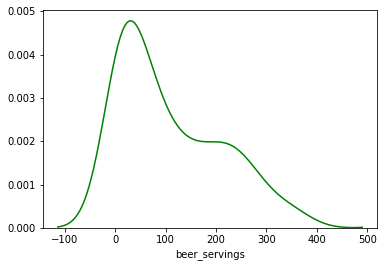

In [82]:
sns.distplot(df['beer_servings'], color = 'green', hist=False)

Spirit histogram

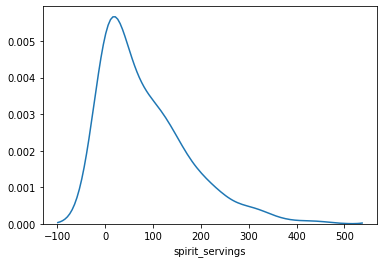

In [83]:
sns.distplot(df['spirit_servings'], hist=False)

Wine servings

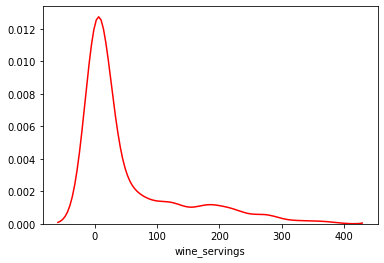

In [84]:
sns.distplot(df['wine_servings'], color='red', hist=False)

Total pure alcohol servings

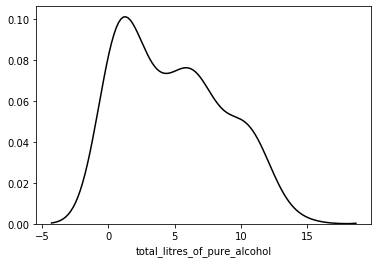

In [85]:
sns.distplot(df['total_litres_of_pure_alcohol'], color='black', hist=False)

In [86]:
df.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'Code', 'Three_Letter_Country_Code',
       'Continent_Name', 'Continent_Code', 'pop_1998', 'pop_2018',
       'Population_diff', 'gdp_1998', 'gdp_2018', 'GDP_diff', 'sub-region',
       'Religion', 'latitude', 'longitude'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


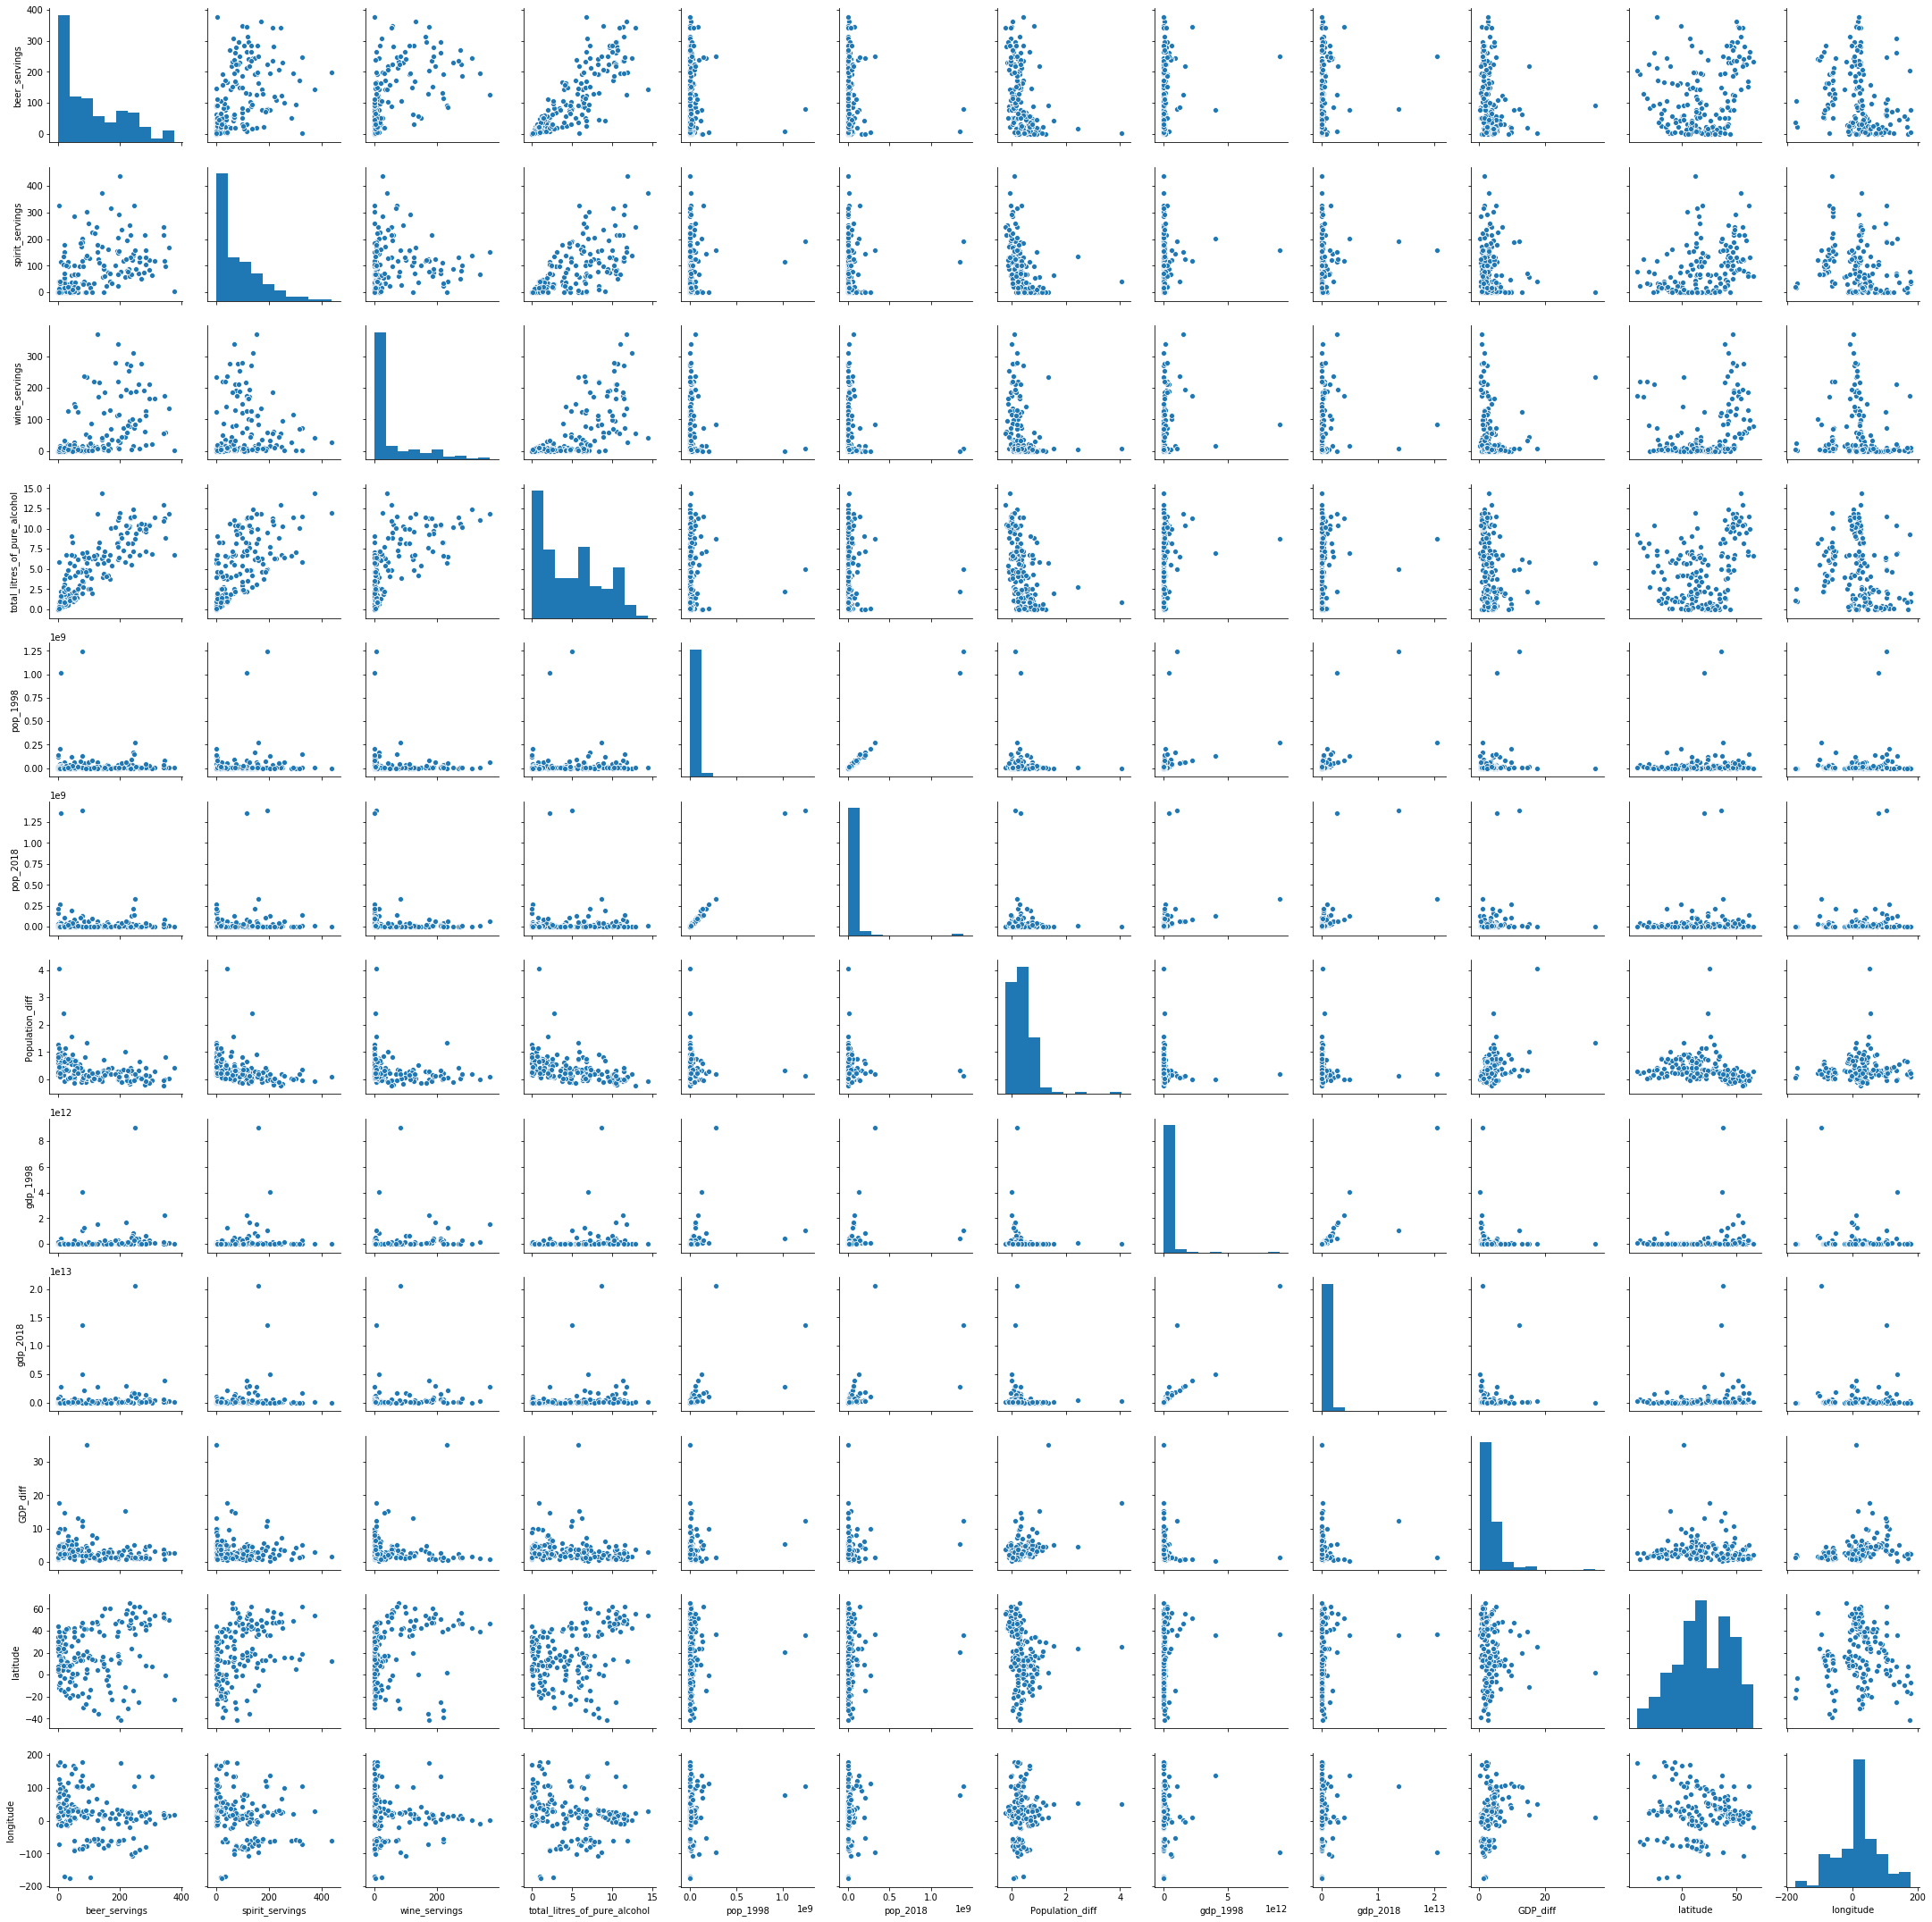

In [87]:
sns.pairplot(df)

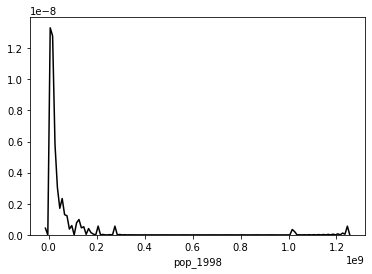

In [88]:
sns.distplot(df['pop_1998'], color='black', hist=False)

## Change GDP and Population to categorical features

In [89]:
df['pop_1998'] = np.select(
    [
        df['pop_1998'] < np.percentile(df['pop_1998'], 20),
        (df['pop_1998'] >= np.percentile(df['pop_1998'], 20)) & (
            df['pop_1998'] < np.percentile(df['pop_1998'], 40)),
        (df['pop_1998'] >= np.percentile(df['pop_1998'], 40)) & (
            df['pop_1998'] < np.percentile(df['pop_1998'], 60)),
        (df['pop_1998'] >= np.percentile(df['pop_1998'], 60)) & (
            df['pop_1998'] < np.percentile(df['pop_1998'], 80)),
        df['pop_1998'] >= np.percentile(df['pop_1998'], 80)
    ],
    [
        'Very small population',
        'Small population',
        'Medium population',
        'Big population',
        'Very big population'
    ],
    default='default')

In [90]:
df['pop_2018'] = np.select(
    [
        df['pop_2018'] < np.percentile(df['pop_2018'], 20),
        (df['pop_2018'] >= np.percentile(df['pop_2018'], 20)) & (
            df['pop_2018'] < np.percentile(df['pop_2018'], 40)),
        (df['pop_2018'] >= np.percentile(df['pop_2018'], 40)) & (
            df['pop_2018'] < np.percentile(df['pop_2018'], 60)),
        (df['pop_2018'] >= np.percentile(df['pop_2018'], 60)) & (
            df['pop_2018'] < np.percentile(df['pop_2018'], 80)),
        df['pop_2018'] >= np.percentile(df['pop_2018'], 80)
    ],
    [
        'Very small population',
        'Small population',
        'Medium population',
        'Big population',
        'Very big population'
    ],
    default='default')

In [91]:
df['gdp_1998'] = df['gdp_1998'].fillna(0)
df['gdp_2018'] = df['gdp_2018'].fillna(0)
df['GDP_diff'] = df['GDP_diff'].fillna(0)

In [92]:
df['gdp_1998'] = np.select(
    [
        df['gdp_1998'] == 0,
        df['gdp_1998'] < np.percentile(df['gdp_1998'], 20),
        (df['gdp_1998'] >= np.percentile(df['gdp_1998'], 20)) & (
            df['gdp_1998'] < np.percentile(df['gdp_1998'], 40)),
        (df['gdp_1998'] >= np.percentile(df['gdp_1998'], 40)) & (
            df['gdp_1998'] < np.percentile(df['gdp_1998'], 60)),
        (df['gdp_1998'] >= np.percentile(df['gdp_1998'], 60)) & (
            df['gdp_1998'] < np.percentile(df['gdp_1998'], 80)),
        df['gdp_1998'] >= np.percentile(df['gdp_1998'], 80)
    ],
    [
        'No info',
        'Very poor',
        'Poor',
        'Medium',
        'Rich',
        'Very rich'
    ],
    default='default')

In [93]:
df['gdp_2018'] = np.select(
    [
        df['gdp_2018'] == 0,
        df['gdp_2018'] < np.percentile(df['gdp_2018'], 20),
        (df['gdp_2018'] >= np.percentile(df['gdp_2018'], 20)) & (
            df['gdp_2018'] < np.percentile(df['gdp_2018'], 40)),
        (df['gdp_2018'] >= np.percentile(df['gdp_2018'], 40)) & (
            df['gdp_2018'] < np.percentile(df['gdp_2018'], 60)),
        (df['gdp_2018'] >= np.percentile(df['gdp_2018'], 60)) & (
            df['gdp_2018'] < np.percentile(df['gdp_2018'], 80)),
        df['gdp_2018'] >= np.percentile(df['gdp_2018'], 80)
    ],
    [
        'No info',
        'Very poor',
        'Poor',
        'Medium',
        'Rich',
        'Very rich'
    ],
    default='default')

# Diff columns

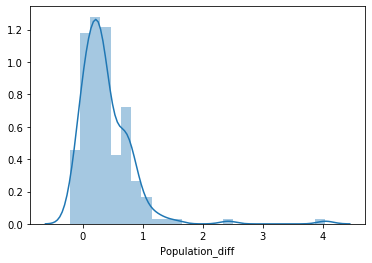

In [94]:
sns.distplot(df['Population_diff'])

In [99]:
df['Population_diff']

country
Afghanistan    0.883313
Albania       -0.083795
Algeria        0.398628
Andorra        0.200555
Angola         1.005896
                 ...   
Uzbekistan     0.370230
Vanuatu        0.644390
Vietnam        0.223062
Zambia         0.758665
Zimbabwe       0.229159
Name: Population_diff, Length: 179, dtype: float64

In [101]:
df['Population_diff'] = np.select(
    [
        df['Population_diff'] < 0,
        df['Population_diff'] == 0,
        (df['Population_diff'] > 0) & (df['Population_diff'] <= 1),
        df['Population_diff'] > 1
    ],
    [
        'Population decrease',
        'No info',
        'Population increase',
        'Big population increase'
    ])

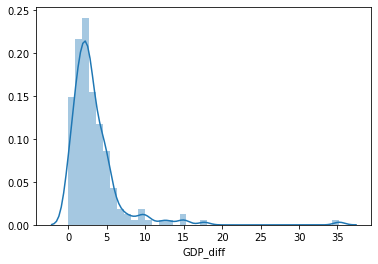

In [102]:
sns.distplot(df['GDP_diff'])

In [105]:
df['GDP_diff'] = np.select(
    [
        df['GDP_diff'] == 0,
        (df['GDP_diff'] > 0) & (df['GDP_diff']
                                < np.percentile(df['GDP_diff'], 25)),
        (df['GDP_diff'] >= np.percentile(df['GDP_diff'], 25)) & (
            df['GDP_diff'] < np.percentile(df['GDP_diff'], 75)),
        df['GDP_diff'] >= np.percentile(df['GDP_diff'], 75)
    ],
    [
        'No info',
        'Small growth',
        'Average growth',
        'Big Growth'
    ])

In [107]:
df.to_csv('prepared_to_analysis.csv')